In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

for fn in uploaded.keys():
    if fn.endswith(".csv"):
        df = pd.read_csv(fn)
        print(f"\nLoaded file: {fn}")
        display(df.head())


Saving final_dataset.csv to final_dataset.csv

Loaded file: final_dataset.csv


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [ ]:
import numpy as np

try:
    df
except NameError:
    raise ValueError("Upload the dataset first using Cell 1!")

print("Initial shape:", df.shape)

df.drop_duplicates(inplace=True)

pollutant_cols = ['PM2.5','PM10','NO2','SO2','CO','Ozone','AQI']
for col in pollutant_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in pollutant_cols:
    df.loc[df[col] < 0, col] = np.nan
    df.loc[df[col] > 2000, col] = np.nan

df[pollutant_cols] = df[pollutant_cols].fillna(df[pollutant_cols].median())

for col in pollutant_cols:
    Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)

df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Month"] = pd.to_numeric(df["Month"], errors="coerce")
df["Date"] = pd.to_numeric(df["Date"], errors="coerce")
df.dropna(subset=["Year","Month","Date"], inplace=True)

print("Final cleaned shape:", df.shape)
df.head()


Initial shape: (1461, 12)
Final cleaned shape: (1461, 12)


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,234.33,442.42,86.605,12.95,2.185,43.19,462.0
1,2,1,2021,0,6,234.33,561.95,52.850,5.18,2.185,16.43,482.0
2,3,1,2021,1,7,225.07,239.04,86.605,10.93,1.400,44.29,263.0
3,4,1,2021,0,1,89.55,132.08,86.605,10.42,1.010,49.19,207.0
4,5,1,2021,0,2,54.06,55.54,86.605,9.70,0.640,48.88,149.0


In [ ]:
df['Datetime'] = pd.to_datetime(
    df[['Year','Month','Date']].rename(columns={'Date':'day'}),
    errors='coerce'
)
df.dropna(subset=["Datetime"], inplace=True)
def get_season(m):
    if m in [12,1,2]:   return "Winter"
    if m in [3,4,5]:    return "Summer"
    if m in [6,7,8]:    return "Monsoon"
    return "Post-Monsoon"

df['Season'] = df['Month'].apply(get_season)

pollutants = pollutant_cols
df.head()


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,Datetime,Season
0,1,1,2021,0,5,234.33,442.42,86.605,12.95,2.185,43.19,462.0,2021-01-01,Winter
1,2,1,2021,0,6,234.33,561.95,52.850,5.18,2.185,16.43,482.0,2021-01-02,Winter
2,3,1,2021,1,7,225.07,239.04,86.605,10.93,1.400,44.29,263.0,2021-01-03,Winter
3,4,1,2021,0,1,89.55,132.08,86.605,10.42,1.010,49.19,207.0,2021-01-04,Winter
4,5,1,2021,0,2,54.06,55.54,86.605,9.70,0.640,48.88,149.0,2021-01-05,Winter


Yearly Average Pollutant Levels:



,Year,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,2021,111.898438,214.167753,43.798425,7.911397,1.156712,34.309260,215.813699
1,2022,95.137836,214.758411,23.736986,15.096137,0.989123,35.089233,208.536986
2,2023,70.321616,211.123425,31.024808,18.794534,0.953137,35.495164,189.060274
3,2024,72.654727,227.472240,36.953074,36.048005,0.869249,38.371803,195.450820


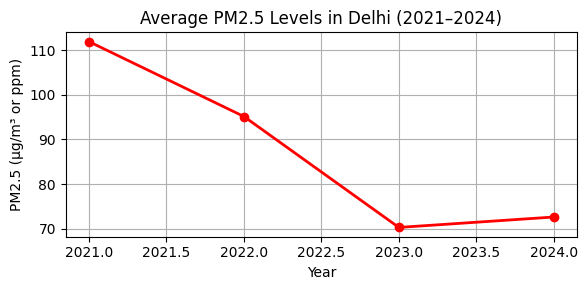

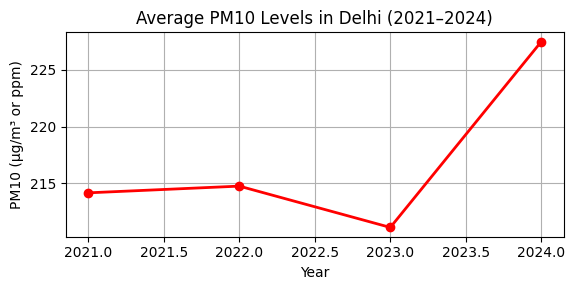

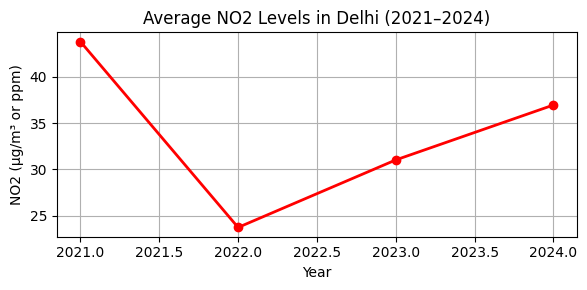

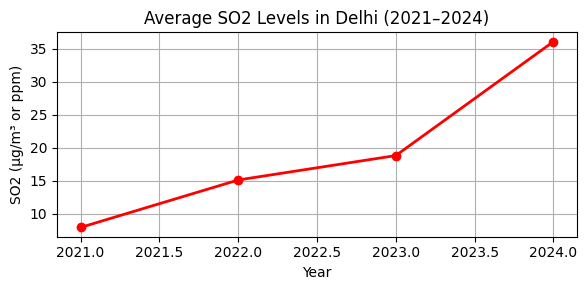

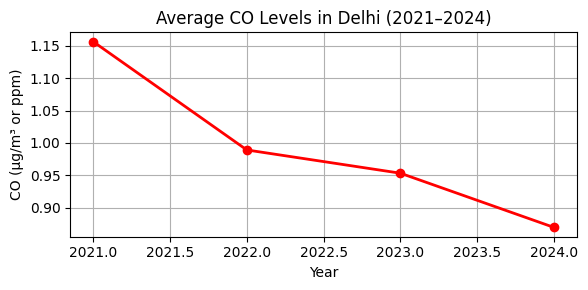

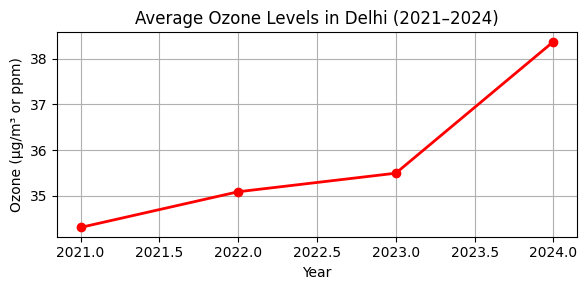

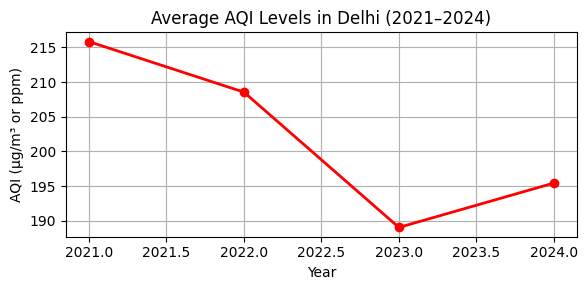

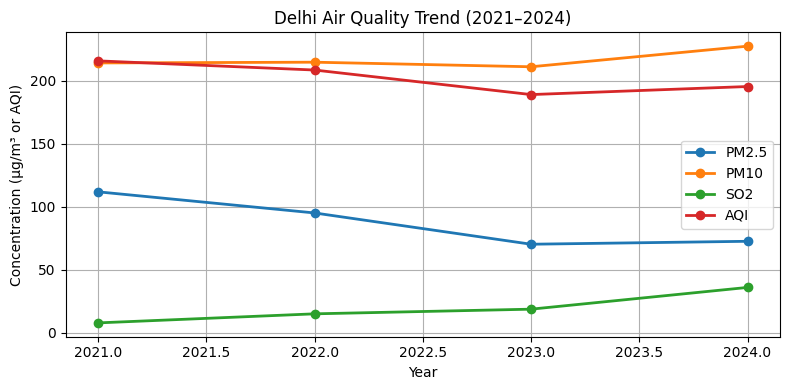

In [ ]:
annual_trends = df.groupby('Year')[pollutants].mean().reset_index()
print("Yearly Average Pollutant Levels:\n")
display(annual_trends)

import matplotlib.pyplot as plt

for col in pollutants:
    plt.figure(figsize=(6,3))
    plt.plot(annual_trends['Year'], annual_trends[col], marker='o', linewidth=2,color='red')
    plt.title(f"Average {col} Levels in Delhi (2021–2024)")
    plt.xlabel("Year")
    plt.ylabel(f"{col} (µg/m³ or ppm)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(8,4))
for col in ['PM2.5','PM10','SO2','AQI']:
    plt.plot(annual_trends['Year'], annual_trends[col], marker='o', linewidth=2, label=col)

plt.title("Delhi Air Quality Trend (2021–2024)")
plt.xlabel("Year")
plt.ylabel("Concentration (µg/m³ or AQI)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


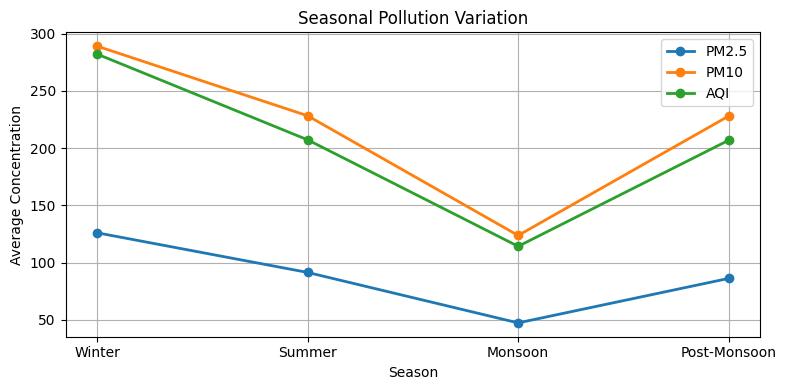

,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
Season,,,,,,,
Winter,125.978726,289.115568,39.209127,14.899571,1.280319,27.521524,282.149584
Summer,91.341033,228.251223,28.780136,22.647133,0.948845,44.629470,207.236413
Monsoon,47.251685,123.672962,29.971970,19.238043,0.658505,40.815802,114.173913
Post-Monsoon,86.117637,228.005824,37.703393,21.040755,1.086731,30.085536,206.854396


In [ ]:
seasonal = df.groupby("Season")[pollutants].mean().reindex(
    ["Winter","Summer","Monsoon","Post-Monsoon"]
)

plt.figure(figsize=(8,4))
for col in ["PM2.5","PM10","AQI"]:
    plt.plot(seasonal.index, seasonal[col], marker='o', linewidth=2, label=col)

plt.title("Seasonal Pollution Variation")
plt.xlabel("Season")
plt.ylabel("Average Concentration")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

seasonal


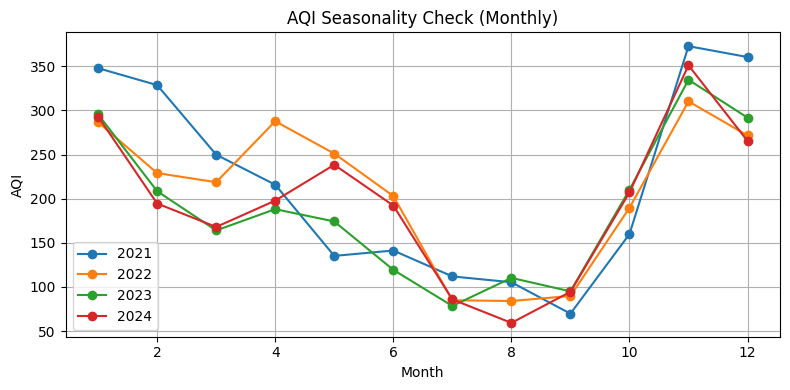

In [ ]:

monthly = df.groupby(["Year","Month"])["AQI"].mean().reset_index()

plt.figure(figsize=(8,4))
for yr in sorted(df["Year"].unique()):
    subset = monthly[monthly["Year"] == yr]
    plt.plot(subset["Month"], subset["AQI"], marker='o', label=str(yr))

plt.title("AQI Seasonality Check (Monthly)")
plt.xlabel("Month")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


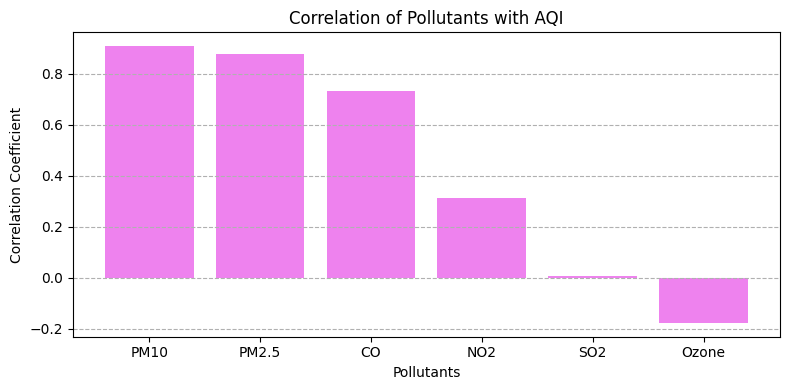

,AQI
PM10,0.908681
PM2.5,0.876832
CO,0.731264
NO2,0.313611
SO2,0.006160
Ozone,-0.176695


In [ ]:
corr = df[pollutants].corr()
corr_with_aqi = corr["AQI"].drop("AQI").sort_values(ascending=False)

plt.figure(figsize=(8,4))
plt.bar(corr_with_aqi.index, corr_with_aqi.values, color="violet")
plt.title("Correlation of Pollutants with AQI")
plt.xlabel("Pollutants")
plt.ylabel("Correlation Coefficient")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

corr_with_aqi


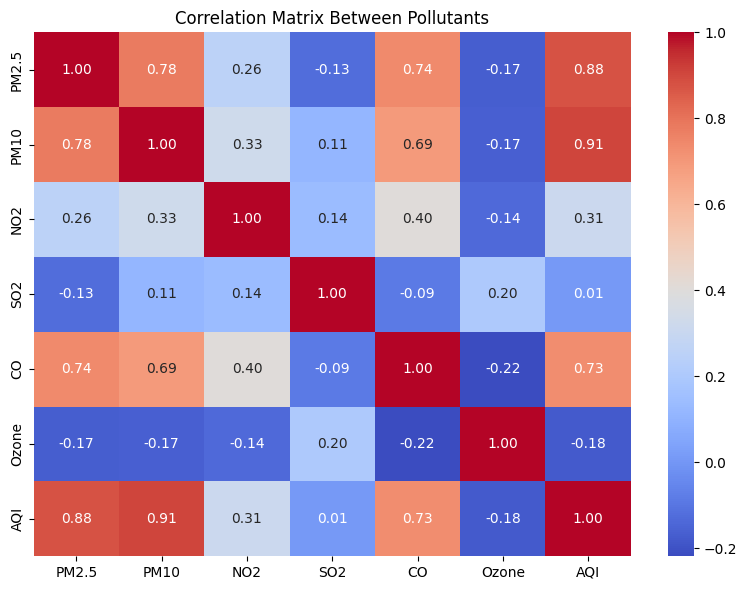

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Between Pollutants")
plt.tight_layout()
plt.show()


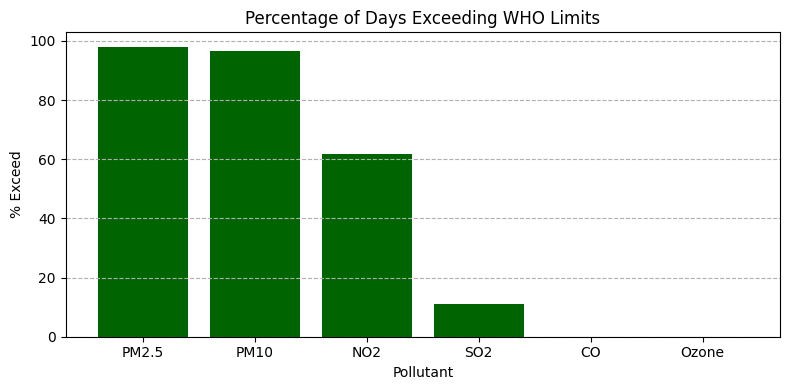

,Pollutant,Exceed_Days,% Exceed
0,PM2.5,1432,98.02
1,PM10,1413,96.71
2,NO2,905,61.94
3,SO2,163,11.16
4,CO,0,0.00
5,Ozone,0,0.00


In [ ]:
WHO_LIMITS = {
    'PM2.5': 15,
    'PM10' : 45,
    'NO2'  : 25,
    'SO2'  : 40,
    'CO'   : 4,
    'Ozone': 100
}

exceed_list = []

for pol, lim in WHO_LIMITS.items():
    exceed_days = (df[pol] > lim).sum()
    total_days  = df[pol].count()
    pct = (exceed_days / total_days) * 100
    exceed_list.append([pol, exceed_days, round(pct, 2)])

exceed_df = pd.DataFrame(exceed_list, columns=["Pollutant","Exceed_Days","% Exceed"])

plt.figure(figsize=(8,4))
plt.bar(exceed_df["Pollutant"], exceed_df["% Exceed"], color="darkgreen")
plt.title("Percentage of Days Exceeding WHO Limits")
plt.xlabel("Pollutant")
plt.ylabel("% Exceed")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

exceed_df


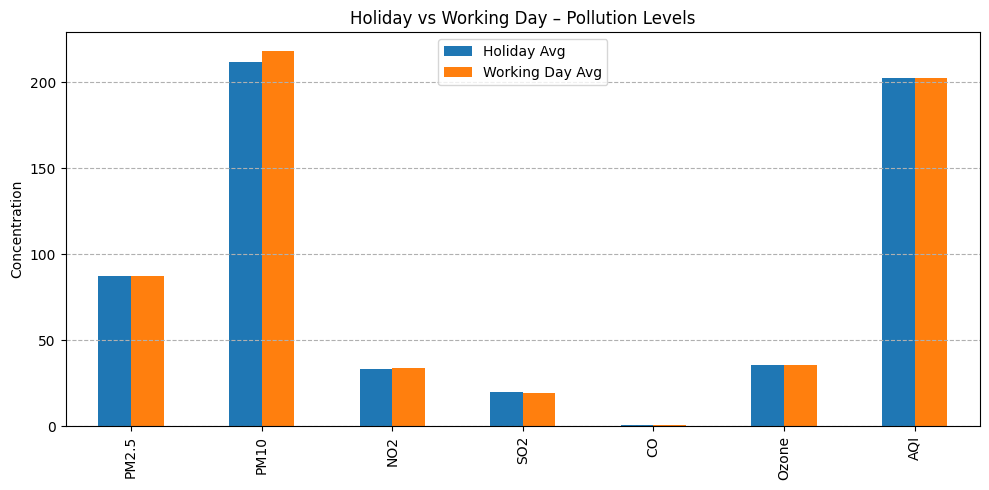

In [ ]:
if "Holidays_Count" in df.columns:
    holidays = df[df["Holidays_Count"] == 1]
    working  = df[df["Holidays_Count"] == 0]

    mean_h = holidays[pollutants].mean()
    mean_w = working[pollutants].mean()

    compare = pd.DataFrame({
        "Holiday Avg": mean_h,
        "Working Day Avg": mean_w,
        "Difference": mean_h - mean_w
    })

    compare[["Holiday Avg","Working Day Avg"]].plot(kind="bar", figsize=(10,5))
    plt.title("Holiday vs Working Day – Pollution Levels")
    plt.ylabel("Concentration")
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()

    compare
else:
    print("Holidays_Count column not found in dataset.")
